# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime
%matplotlib inline


In [2]:
#Criação do DataFrame
df = pd.read_csv('./previsao_de_renda.csv')
df.head()


,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [4]:
df["data_ref"].unique()

array(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
       '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
       '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
       '2016-01-01', '2016-02-01', '2016-03-01'], dtype=object)

In [5]:
var_qltt = df[["posse_de_veiculo","posse_de_imovel","data_ref","sexo","tipo_renda","educacao","estado_civil","mau","tipo_residencia",'renda']].copy()
var_qltt

,posse_de_veiculo,posse_de_imovel,data_ref,sexo,tipo_renda,educacao,estado_civil,mau,tipo_residencia,renda
0,False,True,2015-01-01,F,Assalariado,Secundário,Casado,False,Casa,3369.24
1,True,True,2015-01-01,M,Empresário,Secundário,Casado,False,Casa,6096.14
2,True,True,2015-01-01,M,Assalariado,Superior completo,Casado,False,Casa,5658.98
3,True,False,2015-01-01,F,Empresário,Secundário,Casado,False,Casa,7246.69
4,False,False,2015-01-01,M,Assalariado,Secundário,Casado,False,Casa,4017.37
...,...,...,...,...,...,...,...,...,...,...
14995,True,True,2016-03-01,M,Assalariado,Secundário,Casado,False,Casa,1193.29
14996,True,True,2016-03-01,M,Servidor público,Superior completo,Casado,False,Estúdio,2519.18
14997,True,True,2016-03-01,F,Assalariado,Secundário,Casado,False,Casa,1586.85
14998,False,True,2016-03-01,F,Servidor público,Superior completo,Casado,False,Casa,6975.39


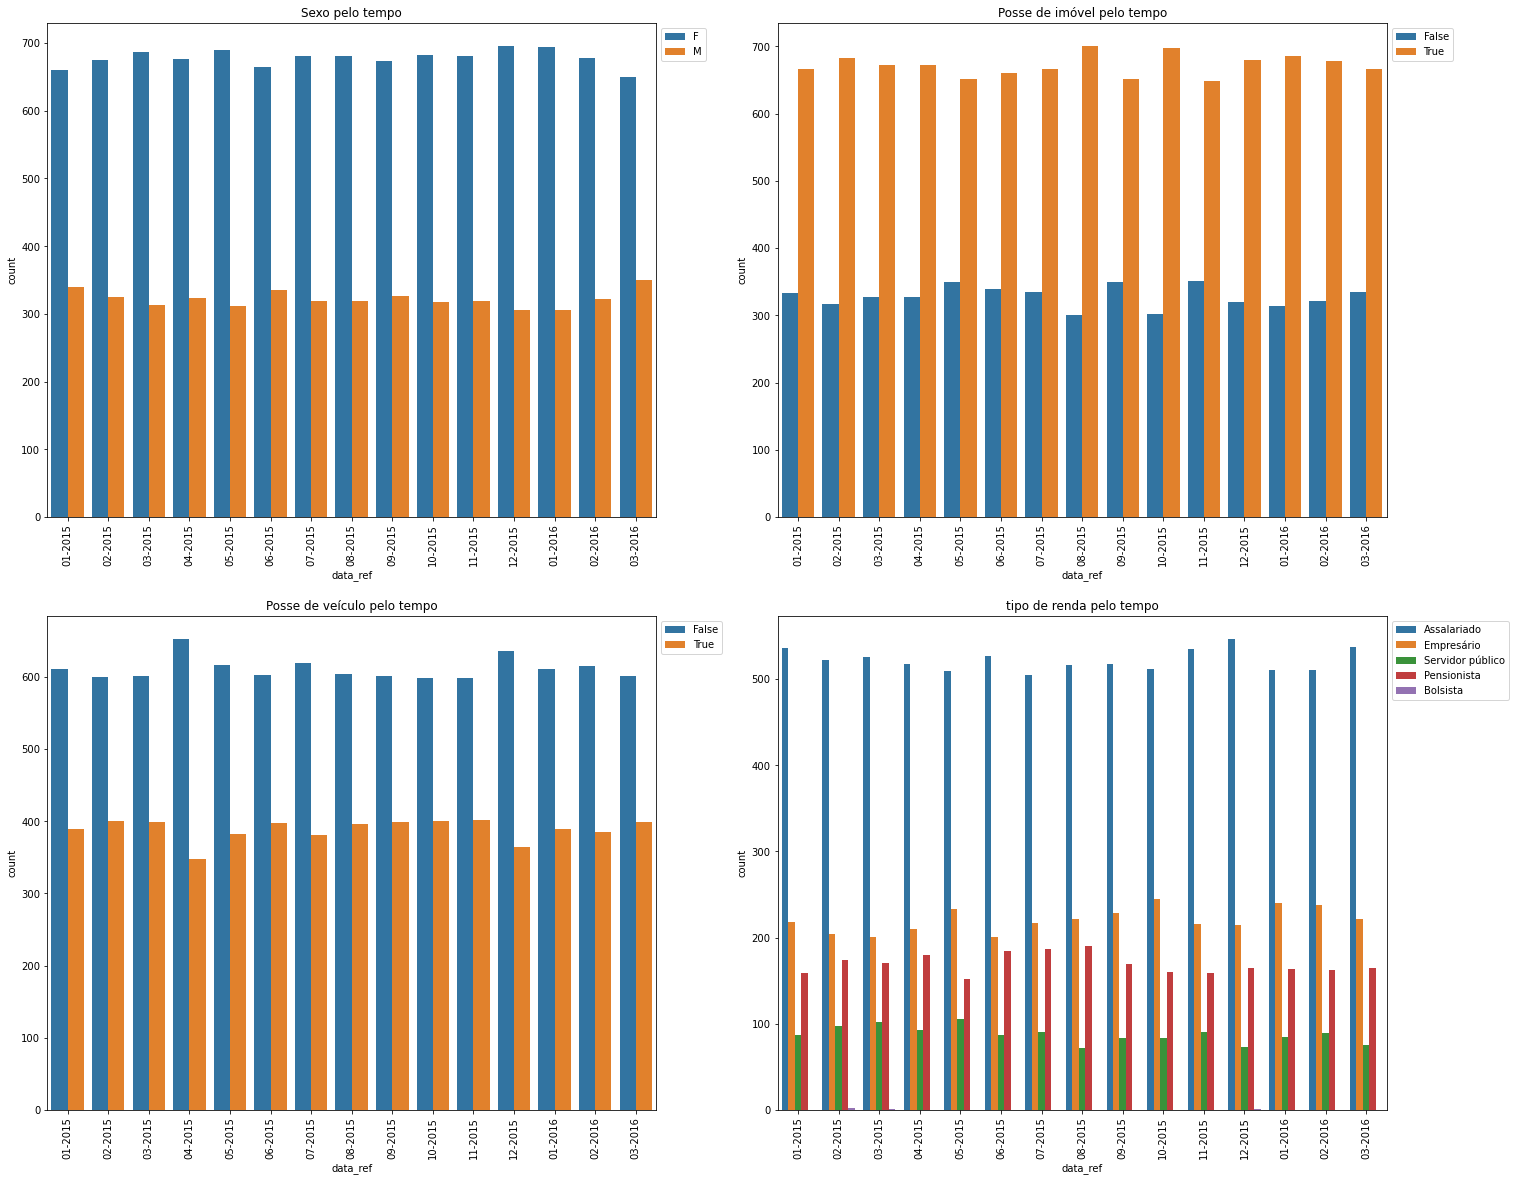

In [6]:
var_qltt["data_ref"] = pd.to_datetime(var_qltt["data_ref"])

plt.figure(figsize=(80, 60))

plt.subplot(2, 2, 1)
ax = sns.countplot(x='data_ref',hue = 'sexo', data=var_qltt)
tick_labs = var_qltt['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
plt.title('Sexo pelo tempo')
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.subplot(2, 2, 2)
ax = sns.countplot(x='data_ref',hue = "posse_de_imovel", data=var_qltt)
tick_labs = var_qltt['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ax.figure.set_size_inches(12, 8)
plt.title('Posse de imóvel pelo tempo')
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.subplot(2, 2, 3)
ax = sns.countplot(x='data_ref',hue = "posse_de_veiculo", data=var_qltt)
tick_labs = var_qltt['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ax.figure.set_size_inches(12, 8)
plt.title('Posse de veículo pelo tempo')
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
labels = ax.set_xticklabels(tick_labs, rotation=90)

                   
plt.subplot(2, 2, 4)
ax = sns.countplot(x='data_ref',hue = "tipo_renda", data=var_qltt)
tick_labs = var_qltt['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ax.figure.set_size_inches(24, 20)
plt.title('tipo de renda pelo tempo')
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
labels = ax.set_xticklabels(tick_labs, rotation=90)



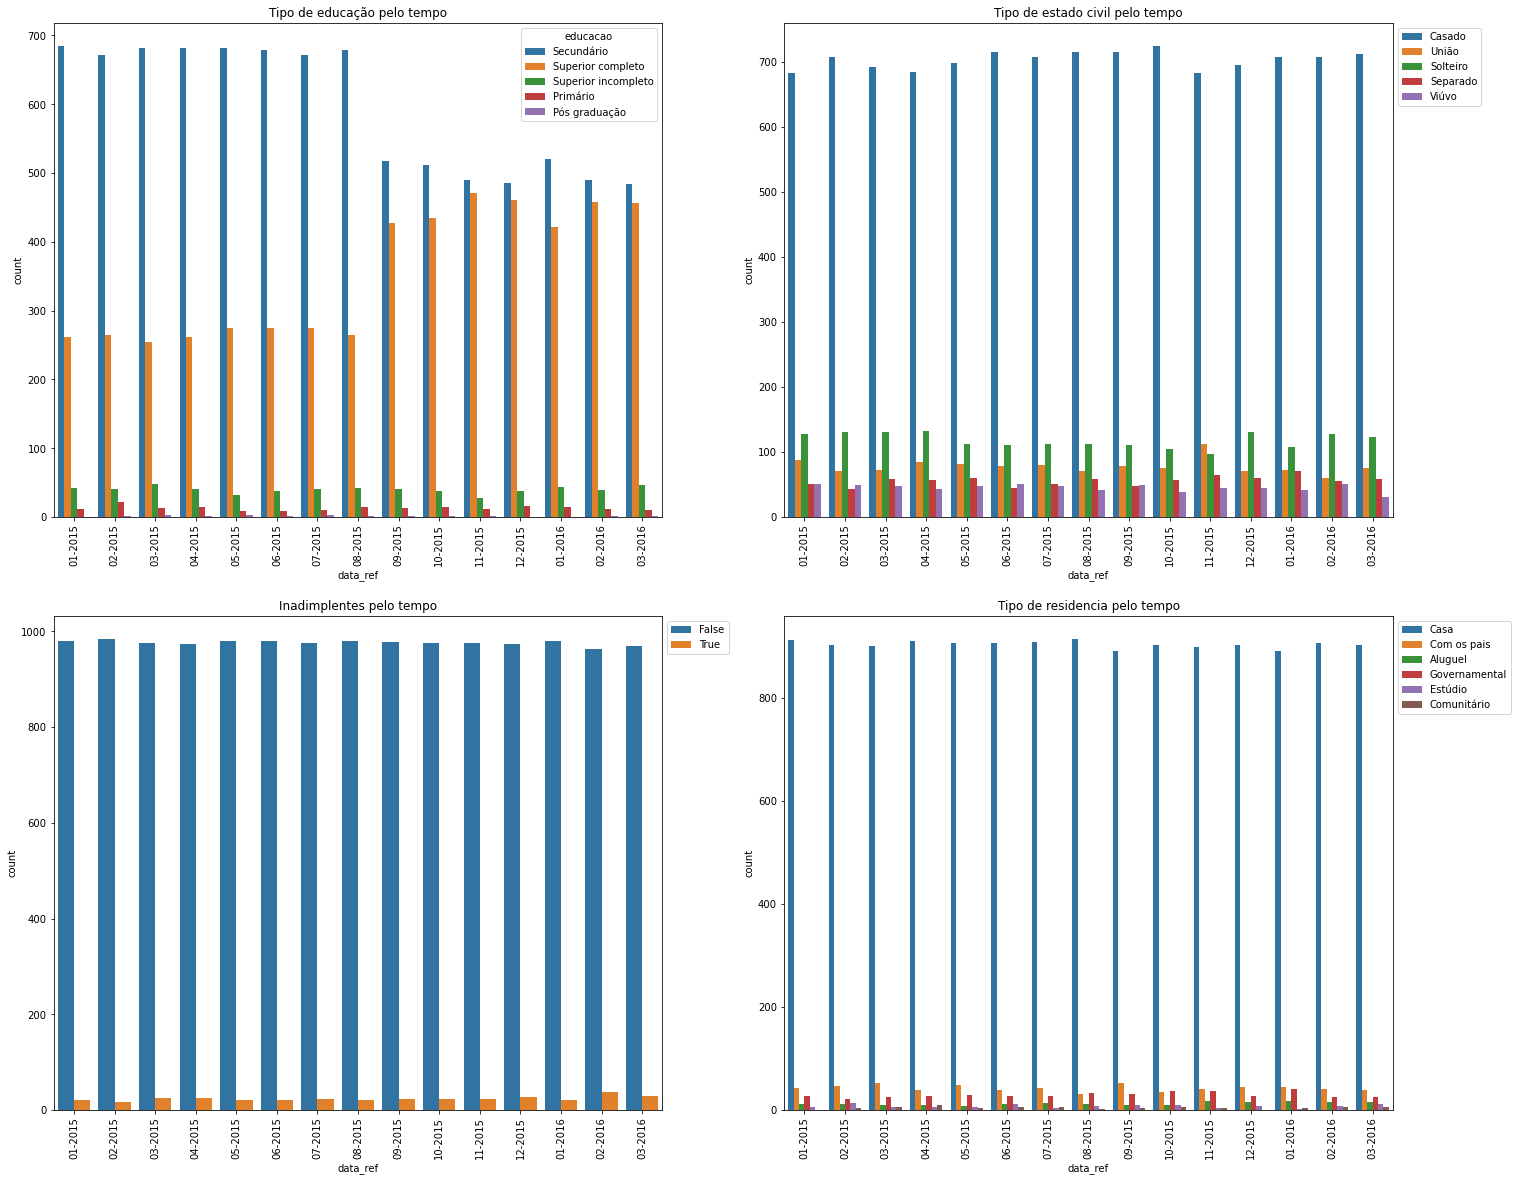

In [7]:
plt.figure(figsize=(100, 80))

plt.subplot(2, 2, 1)
ax = sns.countplot(x='data_ref',hue = "educacao", data=var_qltt)
tick_labs = var_qltt['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ax.figure.set_size_inches(24, 20)
plt.title('Tipo de educação pelo tempo')
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.subplot(2, 2, 2)
ax = sns.countplot(x='data_ref',hue = "estado_civil", data=var_qltt)
tick_labs = var_qltt['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ax.figure.set_size_inches(24, 20)
plt.title('Tipo de estado civil pelo tempo')
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.subplot(2, 2, 3)
ax = sns.countplot(x='data_ref',hue = "mau", data=var_qltt)
tick_labs = var_qltt['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ax.figure.set_size_inches(24, 20)
plt.title('Inadimplentes pelo tempo')
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.subplot(2, 2, 4)
ax = sns.countplot(x='data_ref',hue = "tipo_residencia", data=var_qltt)
tick_labs = var_qltt['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ax.figure.set_size_inches(24, 20)
plt.title('Tipo de residencia pelo tempo')
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
labels = ax.set_xticklabels(tick_labs, rotation=90)



####  Dentre todas variáveis qualitativas a que teve variação significativa no tempo foi a de "educação" a partir do segundo semestre de 2015 o perfil de clientes com superior completo aumentou diretamente proporcional a diminuição de clientes com segundo grau.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

Text(0.5, 1.0, 'Média da renda ao longo do tempo por sexo')

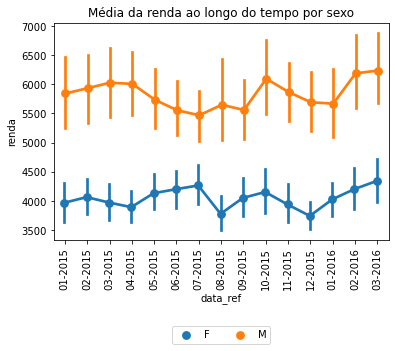

In [16]:
ax = sns.pointplot(x="data_ref", y="renda", hue='sexo',
                   data=var_qltt, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = var_qltt['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(var_qltt['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)
plt.title('Média da renda ao longo do tempo por sexo')

#### Vemos que a mpedia da renda ao longo do tempo por sexo não varia muito ao longo do tempo, possuindo então uma boa estabilidade a variável 'sexo'

Text(0.5, 1.0, 'Média da renda ao longo do tempo por posse de imóvel')

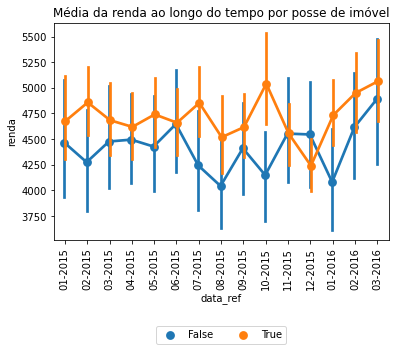

In [24]:
ax = sns.pointplot(x="data_ref", y="renda", hue="posse_de_imovel",
                   data=var_qltt, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = var_qltt['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(var_qltt['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

plt.title('Média da renda ao longo do tempo por posse de imóvel')

#### Vemos uma estabilidade na variável 'posse_de_imovel' onde os que possuem imóvel tem a uam média de renda variando entre 4.250 e 5.000, enquanto os que não possuem variam de 4.000 até 4.800

Text(0.5, 1.0, 'Média da renda ao longo do tempo por posse de veículo')

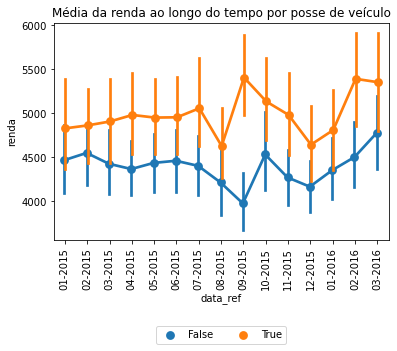

In [17]:
ax = sns.pointplot(x="data_ref", y="renda", hue="posse_de_veiculo",
                   data=var_qltt, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = var_qltt['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(var_qltt['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)
plt.title('Média da renda ao longo do tempo por posse de veículo')

#### A variável ' posse_de_veículo' possuí uma boa estabilidade variando em algum mo mento mas não algo significativo.

Text(0.5, 1.0, 'Média da renda ao longo do tempo por tipo de renda')

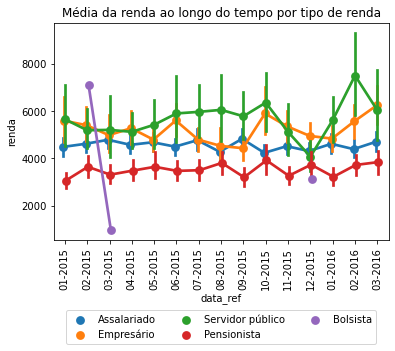

In [18]:
ax = sns.pointplot(x="data_ref", y="renda", hue="tipo_renda",
                   data=var_qltt, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = var_qltt['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(var_qltt['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)
plt.title('Média da renda ao longo do tempo por tipo de renda')

#### Percebemos que tirando a categoria bolsista da variável 'tipo_renda' o restante possui ua boa estabilidade

Text(0.5, 1.0, 'Média da renda ao longo do tempo por tipo de educação')

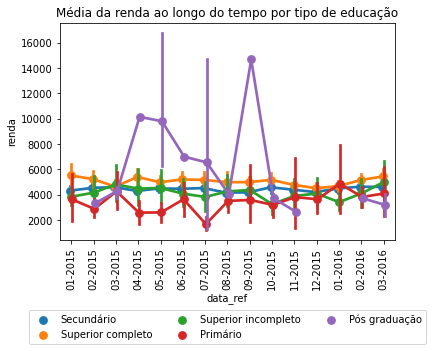

In [19]:
ax = sns.pointplot(x="data_ref", y="renda", hue="educacao",
                   data=var_qltt, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = var_qltt['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(var_qltt['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)
plt.title('Média da renda ao longo do tempo por tipo de educação')

#### Na variável 'educacao' apenas a categoria Pós graduação que não possui estabilidade

Text(0.5, 1.0, 'Média da renda ao longo do tempo por estado civil')

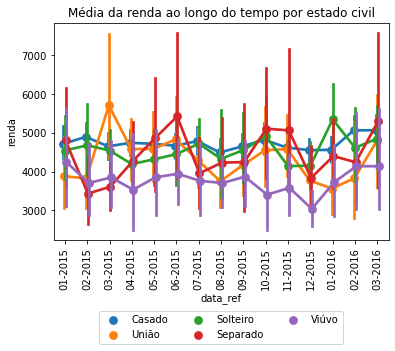

In [21]:
ax = sns.pointplot(x="data_ref", y="renda", hue="estado_civil",
                   data=var_qltt, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = var_qltt['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(var_qltt['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)
plt.title('Média da renda ao longo do tempo por estado civil')

#### Na variável 'estado_civil' com exceção das categorias União e Separado, possui uma boa estabilidade

Text(0.5, 1.0, 'Média da renda ao longo do tempo por inadimplência')

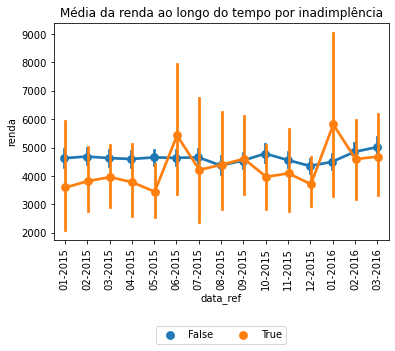

In [22]:
ax = sns.pointplot(x="data_ref", y="renda", hue="mau",
                   data=var_qltt, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = var_qltt['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(var_qltt['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)
plt.title('Média da renda ao longo do tempo por inadimplência')

#### A variável 'mau' tem boa estabilidade 

Text(0.5, 1.0, 'Média da renda ao longo do tempo por tipo de residencia')

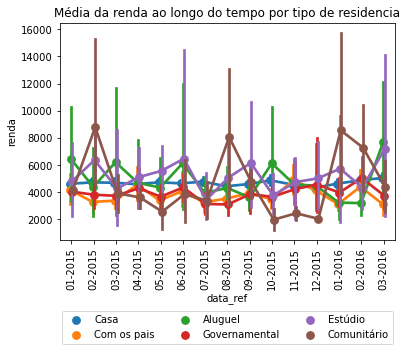

In [25]:
ax = sns.pointplot(x="data_ref", y="renda", hue="tipo_residencia",
                   data=var_qltt, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = var_qltt['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(var_qltt['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)
plt.title('Média da renda ao longo do tempo por tipo de residencia')

#### A variável 'tipo_residencia' com exceção da categoria Comunitário, possui uma boa estabilidade.